In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 9
matplotlib.rcParams['ytick.labelsize'] = 9
matplotlib.rcParams['axes.labelsize'] = 9
matplotlib.rcParams['axes.titlesize'] = 10

matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.color'] = '0.8'
matplotlib.rcParams['grid.linewidth'] = '0.5'

matplotlib.rcParams['axes.edgecolor'] = '0.25'
matplotlib.rcParams['xtick.color'] = '0'
matplotlib.rcParams['ytick.color'] = '0'

matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['xtick.major.size'] = 5
# matplotlib.rcParams['axes.spines.right'] = False
# matplotlib.rcParams['axes.spines.left'] = False
# matplotlib.rcParams['axes.spines.top'] = False
# matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.weight']='ultralight'
# matplotlib.rcParams['font.sans-serif'] = ['Computer Modern Sans Serif']
matplotlib.rcParams['axes.axisbelow'] = True

# Fig1

In [12]:
# file_name_modifiers = 'df_hyphy_Escherichia_Threshold=-20.0to-4.5_Conserved=True_NtRestriction=None'
file_name_modifiers = 'df_hyphy_Escherichia_Threshold=-20.0to-4.5_Conserved=True_NtRestriction=None_Subset=preceding_Position_limitation=3prime'
df_raw = pd.read_csv('../Results/Dataframes/{}_all.csv'.format(file_name_modifiers))
df_ratios = pd.read_csv('../Results/Dataframes/{}_ratios.csv'.format(file_name_modifiers))

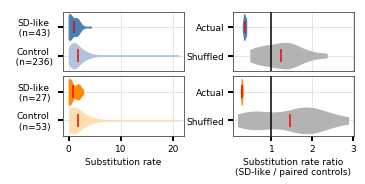

In [13]:
fig = plt.figure(figsize=(5,2.5))
ax1 = fig.add_subplot(221)
columns = ['Control\n(codon)', 'SD-like(codon)']
plot_data = [df_raw[df_raw[i].isnull()==False][i] for i in columns]
violin_parts = ax1.violinplot(plot_data, points=1000, showextrema=False, showmeans=True, widths=0.9, vert=False);
ax1.set_yticks(list(range(1,len(columns)+1)))
# column_plus_n = [i.split('\n')[0]+'\n (n={})'.format(len(df_raw[df_raw[i].isnull()==False])) for i in columns]
column_plus_n = [i.split('\n')[0]+'\n   (n={})  '.format(len(df_raw[df_raw[i].isnull()==False])) for i in columns]
column_plus_n = [i.replace('(codon)', '') for i in column_plus_n]
ax1.set_yticklabels(column_plus_n, ha='center')
for i, pc in enumerate(violin_parts['bodies']):
    if i == 0:
        pc.set_facecolor('lightsteelblue')
        pc.set_edgecolor('lightsteelblue')
        pc.set_alpha(1)
    if i == 1:
        pc.set_facecolor('steelblue')
        pc.set_edgecolor('steelblue')
        pc.set_alpha(1) 
violin_parts['cmeans'].set_edgecolor('r')
ax1.tick_params(axis='y', which='major', pad=25)

ax3 = fig.add_subplot(223, sharex=ax1)
columns = ['Control\n(context)', 'SD-like(trint)']
plot_data = [df_raw[df_raw[i].isnull()==False][i] for i in columns]
violin_parts = ax3.violinplot(plot_data, points=1000, showextrema=False, showmeans=True, widths=0.9, vert=False);
ax3.set_yticks(list(range(1,len(columns)+1)))
column_plus_n = [i.split('\n')[0]+'\n (n={})'.format(len(df_raw[df_raw[i].isnull()==False])) for i in columns]
column_plus_n = [i.replace('(trint)', '') for i in column_plus_n]
ax3.set_yticklabels(column_plus_n, ha='center')
ax3.set_xlabel('Substitution rate')
for i, pc in enumerate(violin_parts['bodies']):
    if i == 0:
        pc.set_facecolor('navajowhite')
        pc.set_edgecolor('navajowhite')
        pc.set_alpha(1)
    if i == 1:
        pc.set_facecolor('darkorange')
        pc.set_edgecolor('darkorange')
        pc.set_alpha(1) 
violin_parts['cmeans'].set_edgecolor('r')

ax3.tick_params(axis='y', which='major', pad=25)
# ax3.set_xlim(0, 10)
# ax3.set_xlim(0, 20)

ax2 = fig.add_subplot(222)
violin_parts = ax2.violinplot([df_ratios['Shuffled_rats_codon'], df_ratios['Actual_rats_codon'],],\
                              widths=0.9, showextrema=False, showmeans=True, vert=False)
for i, pc in enumerate(violin_parts['bodies']):
    if i==0:
        pc.set_facecolor('0.7')
        pc.set_edgecolor('0.7')
        pc.set_alpha(1)   
    if i==1:
        pc.set_facecolor('steelblue')
        pc.set_edgecolor('steelblue')
        pc.set_alpha(1)
violin_parts['cmeans'].set_edgecolor('r')
ax2.axvline(1, c='k')
ax2.set_yticks(list(range(1,len(columns)+1)))
ax2.set_yticklabels(['Shuffled', 'Actual', ], ha='right')

ax4 = fig.add_subplot(224, sharex=ax2)
violin_parts = ax4.violinplot([df_ratios['Shuffled_rats_trint'], df_ratios['Actual_rats_trint']],\
                              widths=0.9, showextrema=False, showmeans=True, vert=False)
for i, pc in enumerate(violin_parts['bodies']):
    if i==0:
        pc.set_facecolor('0.7')
        pc.set_edgecolor('0.7')
        pc.set_alpha(1)   
    if i==1:
        pc.set_facecolor('darkorange')
        pc.set_edgecolor('darkorange')
        pc.set_alpha(1)
violin_parts['cmeans'].set_edgecolor('r')
ax4.axvline(1, c='k')
ax4.set_yticks(list(range(1,len(columns)+1)))
ax4.set_yticklabels(['Shuffled', 'Actual', ], ha='right')
# ax4.set_xticks(np.arange(0, 2.1, 1))
# ax4.set_xlim(0, 2.1)
# ax4.set_xlim(0.25, 1.3)
# ax4.set_xlim(0.88, 1.41)


ax4.set_xlabel('Substitution rate ratio\n(SD-like / paired controls)')
plt.setp(ax2.get_xticklabels(), visible=False);
plt.setp(ax1.get_xticklabels(), visible=False);


for line in ax2.xaxis.get_ticklines():
    line.set_markersize(0)
    line.set_markeredgewidth(0)
for line in ax1.xaxis.get_ticklines():
    line.set_markersize(0)
    line.set_markeredgewidth(0)
plt.tight_layout(pad=0.5, w_pad=-0.1, h_pad=-0.2)

plt.savefig('../Results/Figures/fig_{}.pdf'.format(file_name_modifiers))

# Comparing nucleotide identities

In [ ]:
file_name_modifiers = 'hyphy_Escherichia_Threshold=-20.0to-4.5_Conserved=True_NtRestriction=XXXXX'
df_all = pd.read_csv('../Results/Dataframes/df_{}_ratios.csv'.format(file_name_modifiers.replace('XXXXX', 'None')))
df_strongest = pd.read_csv('../Results/Dataframes/df_{}_ratios.csv'.format(file_name_modifiers.replace('XXXXX', '0')))
df_strong = pd.read_csv('../Results/Dataframes/df_{}_ratios.csv'.format(file_name_modifiers.replace('XXXXX', '1')))
df_weak = pd.read_csv('../Results/Dataframes/df_{}_ratios.csv'.format(file_name_modifiers.replace('XXXXX', '2')))
df_weakest = pd.read_csv('../Results/Dataframes/df_{}_ratios.csv'.format(file_name_modifiers.replace('XXXXX', '3')))



In [ ]:
dfs = [df_all, df_strongest, df_strong, df_weak, df_weakest]
positions = [1.5, 3, 4.5, 6, 7.5]
fig = plt.figure(figsize=(4.5,2.25))
ax1 = fig.add_subplot(121)
violin_parts = ax1.violinplot([i['Actual_rats_codon'] for i in dfs], positions=positions,\
                              widths=0.9, showextrema=False, showmeans=True, vert=True)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor('steelblue')
    pc.set_edgecolor('steelblue')
    pc.set_alpha(0.85)   

violin_parts['cmeans'].set_edgecolor('r')
ax1.axhline(1, c='k')
ax1.set_xticks(positions)
ax1.set_xticklabels(['All', '0', '1', '2', '3'], ha='center')
ax1.set_ylabel('Substitution rate ratio')
ax1.set_xlabel('Mutations resulting in\na stronger SD-like seq', position=(0.6,1))





ax2 = fig.add_subplot(122, sharey=ax1)
violin_parts = ax2.violinplot([i['Actual_rats_trint'] for i in dfs], positions=positions,\
                              widths=0.9, showextrema=False, showmeans=True, vert=True)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor('darkorange')
    pc.set_edgecolor('darkorange')
    pc.set_alpha(0.85)
    
violin_parts['cmeans'].set_edgecolor('r')
ax2.axhline(1, c='k')
ax2.set_xticks(positions)
ax2.set_xticklabels(['All', '0', '1', '2', '3'], ha='center')
ax2.set_xlabel('Mutations resulting in\na stronger SD-like seq', position=(0.6,1))

plt.setp(ax2.get_yticklabels(), visible=False);
for line in ax2.yaxis.get_ticklines():
    line.set_markersize(0)
    line.set_markeredgewidth(0)

# plt.tight_layout()
# plt.savefig('../Results/Figures/weakest_vs_strongest_ratios.pdf')

In [ ]:
file_name_modifiers = 'hyphy_Escherichia_Threshold=-20.0to-4.5_Conserved=True_NtRestriction='
df_all = pd.read_csv('../Results/Dataframes/df_{}None_all.csv'.format(file_name_modifiers))
df_strongest = pd.read_csv('../Results/Dataframes/df_{}0_all.csv'.format(file_name_modifiers))
df_strong = pd.read_csv('../Results/Dataframes/df_{}1_all.csv'.format(file_name_modifiers))
df_weak = pd.read_csv('../Results/Dataframes/df_{}2_all.csv'.format(file_name_modifiers))
df_weakest = pd.read_csv('../Results/Dataframes/df_{}3_all.csv'.format(file_name_modifiers))

In [ ]:
print(len(df_all.index), len(df_all[df_all['SD-like(trint)'].isnull() == False].index))
print(len(df_all.index), len(df_strongest[df_strongest['SD-like(trint)'].isnull() == False].index))
print(len(df_all.index), len(df_strong[df_strong['SD-like(trint)'].isnull() == False].index))
print(len(df_all.index), len(df_weak[df_weak['SD-like(trint)'].isnull() == False].index))
print(len(df_all.index), len(df_weakest[df_weakest['SD-like(trint)'].isnull() == False].index))


# Reading in expression ratio results

In [ ]:
basic_file_name_structure = '../Results/Dataframes/df_hyphy_Escherichia_Threshold=-20to-4.5_Conserved=True_NtRestriction=1_Subset=XXXXX_ratios.csv'
df_lowest = pd.read_csv(basic_file_name_structure.replace('XXXXX', 'lowest'))
df_low = pd.read_csv(basic_file_name_structure.replace('XXXXX', 'low'))
df_med = pd.read_csv(basic_file_name_structure.replace('XXXXX', 'mid'))
df_high = pd.read_csv(basic_file_name_structure.replace('XXXXX', 'high'))
df_highest = pd.read_csv(basic_file_name_structure.replace('XXXXX', 'highest'))

In [ ]:
df_list = [df_lowest, df_low, df_med, df_high, df_highest]
to_plot_codon = [list(temp_df['Actual_rats_codon']) for temp_df in df_list]
to_plot_trint = [list(temp_df['Actual_rats_trint']) for temp_df in df_list]

In [ ]:
cols = ['Codon_rats_lowest', 'Codon_rats_low', 'Codon_rats_med', 'Codon_rats_high', 'Codon_rats_highest']

fig = plt.figure(figsize=(3.5,3.5))
ax1 = fig.add_subplot(211)
violin_parts = ax1.violinplot(to_plot_codon, positions=[1.5, 3, 4.5, 6, 7.5],\
                              widths=0.9, showextrema=False, showmeans=True, vert=True)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor('steelblue')
    pc.set_edgecolor('steelblue')
    pc.set_alpha(1)   

violin_parts['cmeans'].set_edgecolor('r')
ax1.axhline(1, c='k')
ax1.set_xticks([1.5, 3, 4.5, 6, 7.5])
ax1.set_xticklabels(['Lowest 20%', '', '', '', 'Highest 20%'], ha='center')
ax1.set_ylabel('Substitution\nrate ratio')


ax2 = fig.add_subplot(212, sharex=ax1)
violin_parts = ax2.violinplot(to_plot_trint, positions=[1.5, 3, 4.5, 6, 7.5],\
                              widths=0.9, showextrema=False, showmeans=True, vert=True)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor('darkorange')
    pc.set_edgecolor('darkorange')
    pc.set_alpha(1)
violin_parts['cmeans'].set_edgecolor('r')
ax2.axhline(1, c='k')
ax2.set_xticks([1.5, 3, 4.5, 6, 7.5])
ax2.set_xticklabels(['Lowest 20%', '', '', '', 'Highest 20%'], ha='center')
ax2.set_ylabel('Substitution\nrate ratio')
ax2.set_xlabel('Gene expression bins')


plt.setp(ax1.get_xticklabels(), visible=False);
for line in ax1.xaxis.get_ticklines():
    line.set_markersize(0)
    line.set_markeredgewidth(0)

ax1.set_title('Codon control', y=0.96)
ax2.set_title('Context control', y=0.96)
plt.tight_layout(h_pad=0.5)

# plt.savefig('../Results/Figures/ratio_expression_bins.pdf')

# Protein domain analysis

In [ ]:
df = pd.read_csv('../Results/temp_df_domain_analysis_all_NTrestriction=0_ratios.csv')
# df = pd.read_csv('../Results/temp_df_domain_analysis_cotrans_NTrestriction=0_ratios.csv')



cols = ['Actual_rats_codon_domain', 'Actual_rats_codon_post_domain', 'Actual_rats_trint_domain', 'Actual_rats_trint_post_domain']

fig = plt.figure(figsize=(3.5,3.5))
ax1 = fig.add_subplot(211)
violin_parts = ax1.violinplot([df[i] for i in cols], positions=[1.5, 3, 4.5, 6],\
                              widths=0.9, showextrema=False, showmeans=True, vert=True)
for i, pc in enumerate(violin_parts['bodies']):
    if i in [0, 1]:
        pc.set_facecolor('steelblue')
        pc.set_edgecolor('steelblue')
        pc.set_alpha(1)   
    elif i in [2,3]:
        pc.set_facecolor('darkorange')
        pc.set_edgecolor('darkorange')
        pc.set_alpha(1) 
        
violin_parts['cmeans'].set_edgecolor('r')
ax1.axhline(1, c='k')
ax1.set_xticks([1.5, 3, 4.5, 6])
ax1.set_xticklabels([''])
ax1.set_ylabel('Substitution\nrate ratio')
ax1.set_title('Locally strong sites')





###############################
df = pd.read_csv('../Results/temp_df_domain_analysis_all_NTrestriction=3_ratios.csv')
# df = pd.read_csv('../Results/temp_df_domain_analysis_cotrans_NTrestriction=3_ratios.csv')


cols = ['Actual_rats_codon_domain', 'Actual_rats_codon_post_domain', 'Actual_rats_trint_domain', 'Actual_rats_trint_post_domain']

ax2 = fig.add_subplot(212)
violin_parts = ax2.violinplot([df[i] for i in cols], positions=[1.5, 3, 4.5, 6],\
                              widths=0.9, showextrema=False, showmeans=True, vert=True)
for i, pc in enumerate(violin_parts['bodies']):
    if i in [0, 1]:
        pc.set_facecolor('steelblue')
        pc.set_edgecolor('steelblue')
        pc.set_alpha(1)   
    elif i in [2,3]:
        pc.set_facecolor('darkorange')
        pc.set_edgecolor('darkorange')
        pc.set_alpha(1) 
        
violin_parts['cmeans'].set_edgecolor('r')
ax2.axhline(1, c='k')
ax2.set_xticks([1.5, 3, 4.5, 6])
ax2.set_xticklabels(['Inside\nDomain', 'Post\nDomain', 'Inside\nDomain', 'Post\nDomain'], ha='center', rotation=0)
ax2.set_ylabel('Substitution\nrate ratio')
ax2.set_title('Locally weak sites')
ax2.set_yticks([0.7, 1.0, 1.3])

plt.setp(ax1.get_xticklabels(), visible=False);
for line in ax1.xaxis.get_ticklines():
    line.set_markersize(0)
    line.set_markeredgewidth(0)
plt.tight_layout()


plt.savefig('../Results/Figures/domains_all.pdf')